# Computing $T_{eff}$ for EBTEL-2fluid Runs: Emission from Electron and Ion Heating Cases

In [1]:
import sys
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append('/home/wtb2/Documents/sunFM/')
sys.path.append('/home/wtb2/Documents/EBTEL_analysis/src/')
sys.path.append('/home/wtb2/Documents/EBTEL_C/bin/')
import ebtel_run as tf_run
import ebtel_plot as ebp
import ebtel_wrapper as sf_wrap

/usr/lib/python3/dist-packages/matplotlib/__init__.py:1175: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/usr/lib/python3/dist-packages/matplotlib/__init__.py:1175: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


We will compute emission measure distributions for sample EBTEL runs for $L=40$ Mm, $T_N=5000$ s, $\alpha=-2.5$, $\beta=1$, for electron, ion, and single-fluid heating cases.

First, we need to replace the `print_plasma_params` option in the XML files. Then, we will compute each of the EBTEL runs. Finally, we will compute $T_{eff}$ using the `Ion_Pop_Solver` code and construct emission measure distributions for both $T$ and $T_{eff}$.

Change files so that all parameters will be printed.

In [2]:
#electron file
tree = ET.parse('ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_electron.xml')
root = tree.getroot()
elem = root.find('print_plasma_params')
elem.text = 'True'
elem = root.find('output_file')
elem.text = '/home/wtb2/Documents/research_notebook/EBTEL/ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_electron'
tree.write('ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_electron.xml')
#ion file
tree = ET.parse('ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_ion.xml')
root = tree.getroot()
elem = root.find('print_plasma_params')
elem.text = 'True'
elem = root.find('output_file')
elem.text = '/home/wtb2/Documents/research_notebook/EBTEL/ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_ion'
tree.write('ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_ion.xml')
#single file
tree = ET.parse('ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_single.xml')
root = tree.getroot()
elem = root.find('print_plasma_params')
elem.text = 'True'
elem = root.find('output_file')
elem.text = '/home/wtb2/Documents/research_notebook/EBTEL/ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_single'
tree.write('ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_single.xml')

Now, run the code.

In [3]:
tf_runner = tf_run.Runner('/home/wtb2/Documents/EBTEL-2fluid_repo/bin/',
                         '/home/wtb2/Documents/research_notebook/EBTEL/ebtel_data/')
tf_runner.run_ebtel_single('ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_electron.xml')
tf_runner.run_ebtel_single('ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_ion.xml')
sf_wrap.run_ebtel('/home/wtb2/Documents/EBTEL_C/bin/',
                 '/home/wtb2/Documents/research_notebook/EBTEL/ebtel_data/',
                 config_file='ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_single.xml')

************************************************************************************
            Enthalpy Based Thermal Evolution of Loops (EBTEL)						
			   Two-fluid Model											
************************************************************************************

Original single-fluid code written in IDL by J.A. Klimchuk, S. Patsourakos, P.J. Cargill
See Klimchuk, J.A, S. Patsourakos & P.J. Cargill 2008, ApJ 682:1351-2362
See also Cargill, P.J., S.J. Bradshaw & J.A. Klimchuk 2012, ApJ 752:161-174

Translation into the C Programming Language by Will Barnes,
Dept. of Physics & Astronomy, Rice University (2014)
************************************************************************************

INPUTS
------
Total time: 80000 s
Time step: 1.000000 s
Loop half-length: 40.000000 Mm
Usage option(see documentation): dem
Heating pulse shape: triangle
Heating species: electron
Solving equations using adaptive fourth order Runge-Kutta routine
Using Raymond-Klimchuk Loss Function
Using l

Read in the data and print to files to be read by `Ion_Pop_Solver` code.

In [27]:
dat = np.loadtxt('ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_electron.txt')
np.savetxt('ebtel_data/electron_T_n_profile.txt',np.transpose([dat[:,0],dat[:,1],dat[:,3]]),
           header=str(len(dat[:,0])),comments='',fmt='%f\t%e\t%e')
dat = np.loadtxt('ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_ion.txt')
np.savetxt('ebtel_data/ion_T_n_profile.txt',np.transpose([dat[:,0],dat[:,1],dat[:,3]]),
           header=str(len(dat[:,0])),comments='',fmt='%f\t%e\t%e')
dat = np.loadtxt('ebtel_data/ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_single.txt')
np.savetxt('ebtel_data/single_T_n_profile.txt',np.transpose([dat[:,0],dat[:,1],dat[:,2]]),
           header=str(len(dat[:,0])),comments='',fmt='%f\t%e\t%e')

Run the `Ion_Pop_Solver` code for the three sets of $n(t),T(t)$ profiles (external).

First, look at the resulting temperature and density profiles for the three cases.

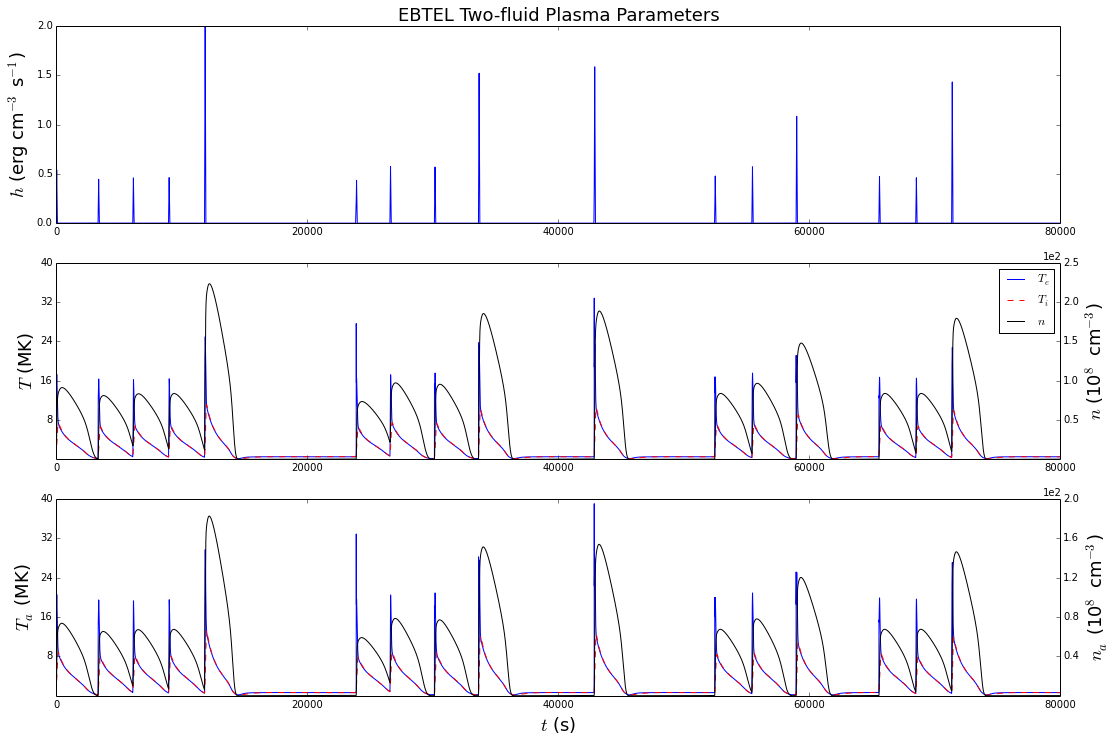

In [2]:
plotter = ebp.Plotter(parent_dir='ebtel_data/',child='ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_electron')
plotter.plot_params()

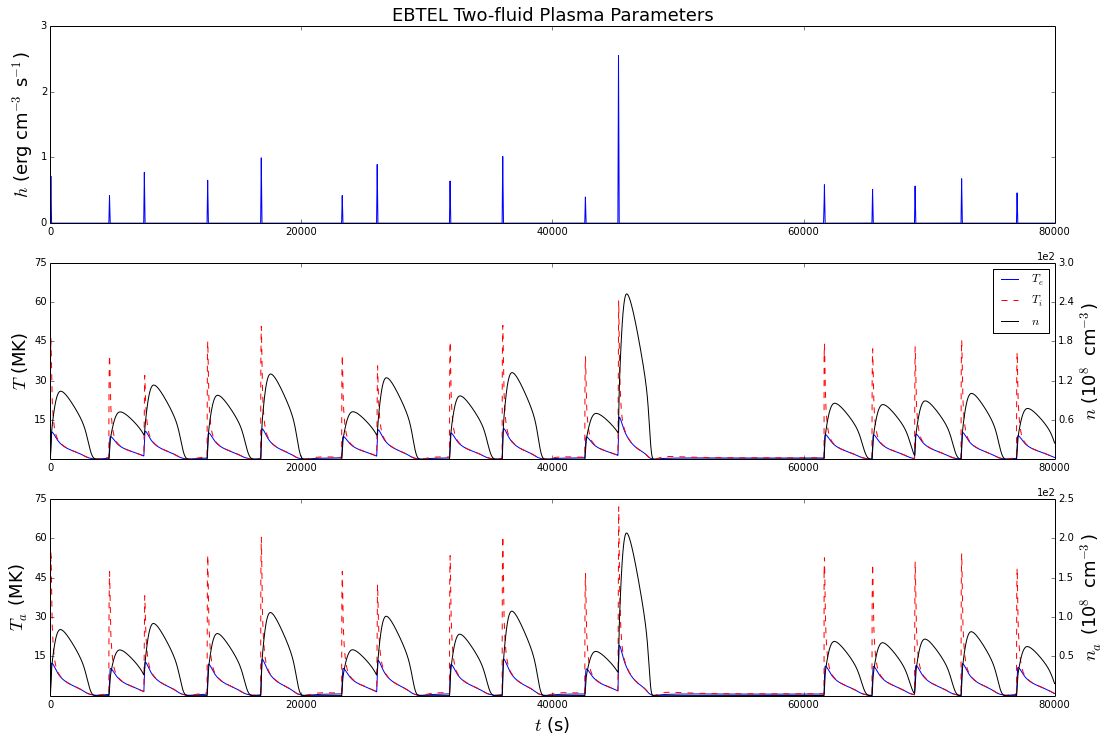

In [3]:
plotter = ebp.Plotter(parent_dir='ebtel_data/',child='ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_ion')
plotter.plot_params()

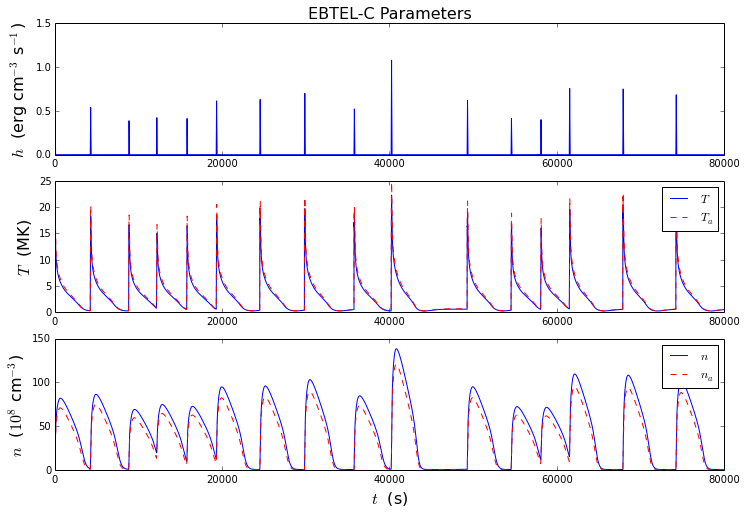

In [4]:
sf_wrap.plot_ebtel('ebtel_data/','ebtel_L40.0_tn5000-b1.0_tpulse100.0_rka4_0_single.txt')

Now that we've run the $T_{eff}$ code to take into account non-equilibrium ionization, let's plot $T_{eff}$ and compare to $T$ for the three cases.

In [19]:
def ion_pop_t_plotter(filename):
    #load file
    data = np.loadtxt(filename)
    #get relevant data
    t = data[:,0]
    T = data[:,1]
    Teff = data[:,2]
    n = data[:,3]
    #calculate difference between temperatures
    tteff_eps = np.fabs(T - Teff)/np.fabs(T + Teff)
    
    #set up figure
    fig = plt.figure(figsize=(10,8))
    ax = fig.gca()
    #plot
    line_tteff_eps = ax.plot(t,tteff_eps,color='k',linestyle='-',
                             label=r'$\epsilon_{T}$')
    ax_n = ax.twinx()
    line_n = ax_n.plot(t,n,label=r'$n$',color='red')
    #labels
    ax.set_ylabel(r'$\epsilon_{T}$')
    ax.set_xlabel(r'$t$')
    ax_n.set_ylabel(r'$n$')
    #limits
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax_n.set_xscale('log')
    #legend
    lines = line_n + line_tteff_eps 
    labels = [l.get_label() for l in lines]
    ax.legend(lines,labels,loc='best')
    #show or print
    plt.show()

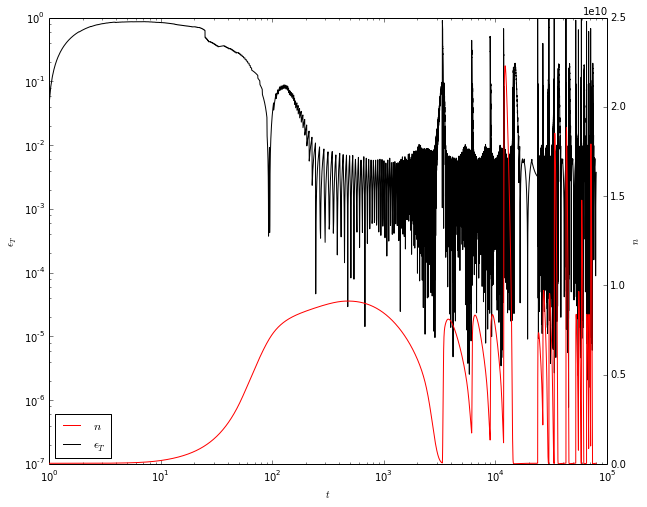

In [20]:
ion_pop_t_plotter('ebtel_data/teff_electron_ebtel.txt')

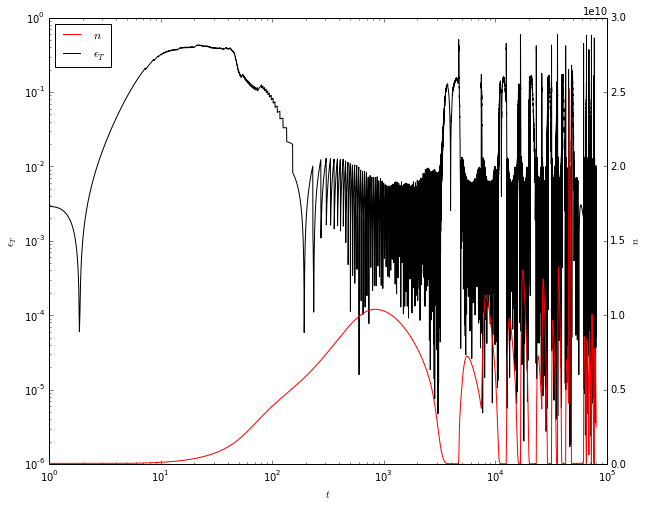

In [21]:
ion_pop_t_plotter('ebtel_data/teff_ion_ebtel.txt')

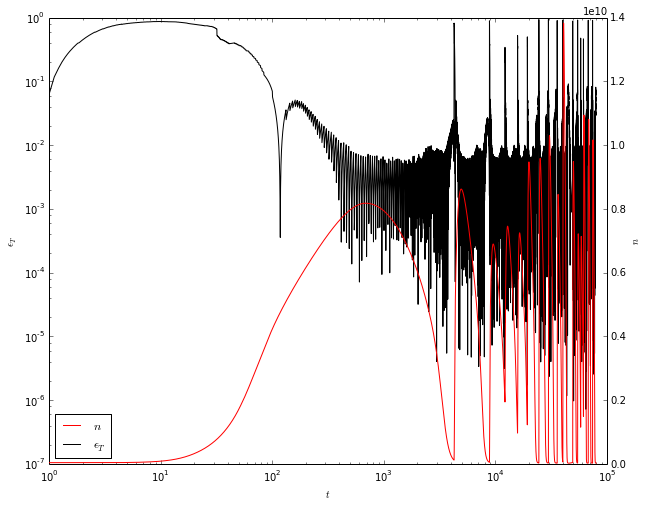

In [22]:
ion_pop_t_plotter('ebtel_data/teff_single_ebtel.txt')